<a href="https://colab.research.google.com/github/SankethHanasi/6thSem-ML-Lab/blob/main/1BM22CS242_Lab8_AdaBoost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Default accuracy (n_estimators=10): 0.8182


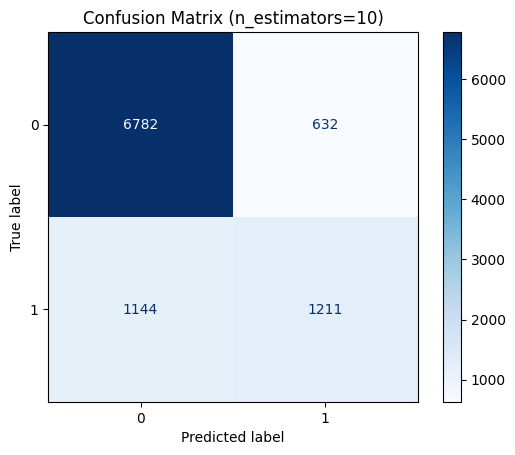

Best accuracy: 0.8340 using 73 estimators


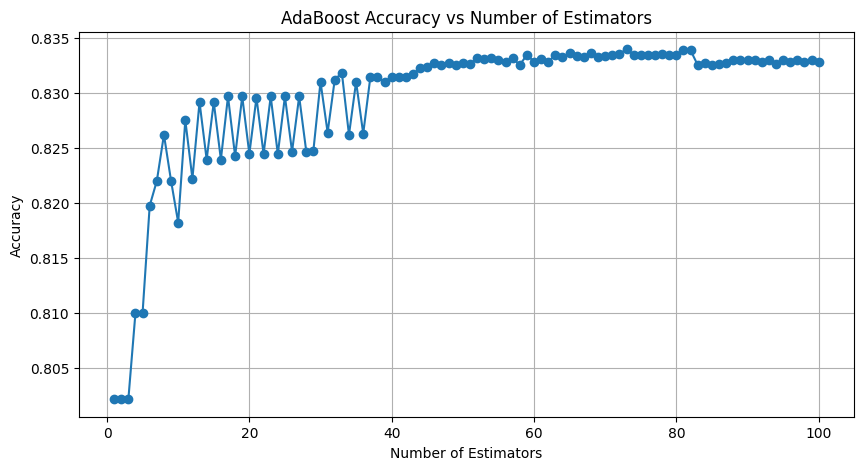

In [ ]:
import pandas as pd
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("income.csv")  # Update path if needed

# Features and target
X = df.drop("income_level", axis=1)
y = df["income_level"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train AdaBoost classifier with default n_estimators=10
ada_default = AdaBoostClassifier(n_estimators=10, random_state=42)
ada_default.fit(X_train, y_train)
y_pred_default = ada_default.predict(X_test)
default_accuracy = accuracy_score(y_test, y_pred_default)

print(f"Default accuracy (n_estimators=10): {default_accuracy:.4f}")

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_default)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix (n_estimators=10)")
plt.show()

# Fine-tune: test n_estimators from 1 to 100
accuracies = []
estimator_range = range(1, 101)

for n in estimator_range:
    ada = AdaBoostClassifier(n_estimators=n, random_state=42)
    ada.fit(X_train, y_train)
    y_pred = ada.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))

# Best accuracy and corresponding number of estimators
best_accuracy = max(accuracies)
best_n = estimator_range[accuracies.index(best_accuracy)]

print(f"Best accuracy: {best_accuracy:.4f} using {best_n} estimators")

# Plot accuracy vs number of estimators
plt.figure(figsize=(10, 5))
plt.plot(estimator_range, accuracies, marker='o')
plt.title("AdaBoost Accuracy vs Number of Estimators")
plt.xlabel("Number of Estimators")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()